In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Convolution

### A) convolution by hand

in the notebook

### B) simple convolution

My result: [0.13511579 0.32412592 0.60776515 0.89205693 1.03639264 0.98390527]
CV2 result: [0.13511579 0.32412592 0.60776515 0.89205693 1.03639264 0.98390527]


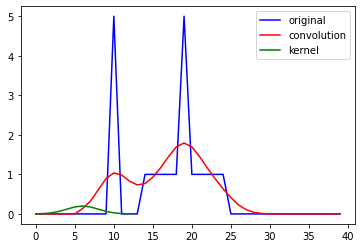

In [7]:
# compute convolution

def simple_convolution(signal, kernel):
    N = (len(kernel) - 1) // 2
    convolution = np.zeros(np.shape(signal))
    for i in range(N, len(signal) - N):
        for u in range(-N, N + 1):
            convolution[i] += kernel[N + u] * signal[i - u]
    return convolution

# run method on dataset
from a2_utils import read_data
signal = read_data('signal.txt')
kernel = read_data('kernel.txt')

# compare method with built-in method
convolution = simple_convolution(signal, kernel)
print(f'My result: {convolution[6:12]}')
cv2_con = cv2.filter2D(signal,-1,kernel).reshape(-1)
print(f'CV2 result: {cv2_con[6:12]}')

# show result
x_size = range(len(signal))
plt.plot(x_size, signal, color='blue', label='original')
plt.plot(x_size, convolution, color='red', label='convolution')
plt.plot(range(len(kernel)),kernel, color='green', label='kernel')
plt.legend(loc="upper right")
plt.show()

**Question**: Can you recognize the shape of the kernel? What is the sum of the
elements in the kernel? How does the kernel affect the signal?

Answer: gaussian kernel, 1

### D) Gaussian kernel

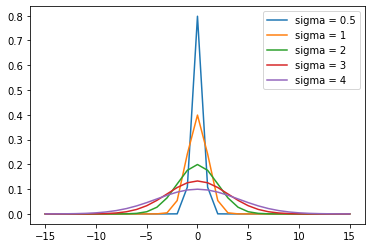

In [8]:
from math import pi,sqrt,exp

def get_gauss_kernel(size, sigma):
    kernel = list(map(
        lambda x: 1/(sqrt(2*pi)*sigma)*exp(-x**2/(2*sigma**2)),
        range(-size,size+1)
    ))
    return kernel

#show all kernels
size = 15
x_size = range(-size, size+1)
for sigma in [0.5,1,2,3,4]:
    kernel = get_gauss_kernel(size, sigma)
    plt.plot(x_size, kernel, label=f'sigma = {sigma}')
plt.legend(loc='upper right')
plt.show()

**Question**: The figure below shows two kernels (a) and (b) as well as signal (c).
Sketch (do not focus on exact proportions of your drawing but rather on the under-
standing of what you are doing) the resulting convolved signal of the given input
signal and each kernel. You can optionally also implement a convolution demo based
on the signals and your convolution code, but the important part here is your un-
derstanding of the general idea of convolution.

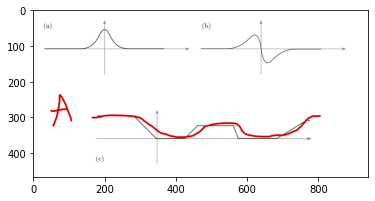

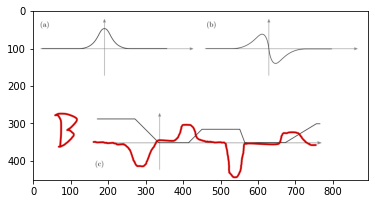

In [9]:
I = cv2.imread("questions_img/A-question.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.show()

I = cv2.imread("questions_img/B-question.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.show()

### E) Associative of convolution

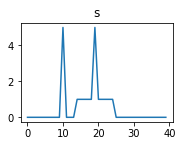

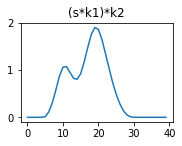

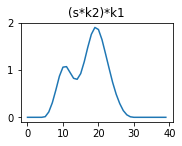

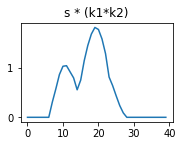

In [10]:
from a2_utils import read_data

k1 = get_gauss_kernel(4,2)
k2 = [0.1,0.6,0.4]
signal = read_data('signal.txt')

x_size = range(len(signal))
plt.subplot(2,2,1)
plt.plot(signal)
plt.title('s')
plt.show()

plt.subplot(2,2,2)
con1 = simple_convolution(signal, k1)
con2 = simple_convolution(con1, k2)
plt.plot(con2)
plt.title('(s*k1)*k2')
plt.show()

plt.subplot(2,2,3)
con1 = simple_convolution(signal, k2)
con2 = simple_convolution(con1, k1)
plt.plot(con2)
plt.title('(s*k2)*k1')
plt.show()

#simple convolution on k3 slightly modify kernel on edges so the plots are not same
plt.subplot(2,2,4)
k3 = simple_convolution(k1, k2)
con = simple_convolution(signal, k3)
plt.plot(con)
plt.title('s * (k1*k2)')
plt.show()
